In [1]:
import numpy as np
import pandas as pd
import scipy as sc
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv(r'd:\DownLoads\credit_card_default_analysis.csv', index_col='ID')

In [3]:
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,0,0,0,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,0,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,0,0,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
data.default.value_counts()

0    23364
1     6636
Name: default, dtype: int64

In [5]:
data.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,0.356767,0.320033,0.304067,0.258767,0.22150,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,0.760594,0.801727,0.790589,0.761113,0.71772,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.00000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [6]:
default = data[data.default == 1].LIMIT_BAL.values
med1 = np.median(default)

nodefault = data[data.default == 0].LIMIT_BAL.values
med2 = np.median(nodefault)

In [7]:
med1

90000.0

In [8]:
med2

150000.0

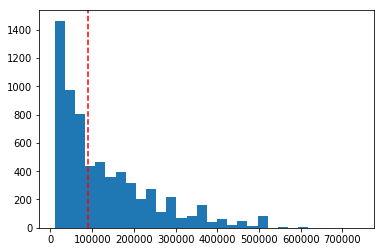

In [9]:
plt.hist(default,bins=30)
plt.axvline(med1,color='r',linestyle='dashed')

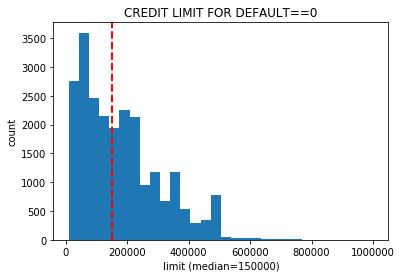

In [10]:
plt.hist(nodefault, bins=30)
plt.xlabel("limit (median=%d)" % med2)
plt.ylabel("count")
plt.title("CREDIT LIMIT FOR DEFAULT==0")
plt.axvline(med2, color='r', linestyle='dashed', linewidth=2)

In [11]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

In [12]:
def stat_intervals(stat, alpha=0.05):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [13]:
np.random.seed(123)

def_median_scores = np.median(get_bootstrap_samples(default, 1000), axis=1)
nodef_median_scores = np.median(get_bootstrap_samples(nodefault, 1000), axis=1)

print ("95% confidence interval for Default clients:",  stat_intervals(def_median_scores))
print ("95% confidence interval for Good clients:",  stat_intervals(nodef_median_scores))

95% confidence interval for Default clients: [80000. 90000.]
95% confidence interval for Good clients: [150000. 150000.]


In [14]:
np.median(nodefault) - np.median(default)

60000.0

In [15]:
median_scores = map(lambda x: x[0] - x[1], zip(def_median_scores, nodef_median_scores))
print(stat_intervals(list(median_scores)))

[-70000. -60000.]


In [16]:
median_scores

In [17]:
def permutation_test_ind(sample1, sample2, max_permutations=None, alternative='two-sided'):
    ''' Перестановочный критерий (независимые выборки)

    :param sample1: выборка 1
    :param sample2: выборка 2
    :param max_combinations: количество перестановок, None - все возможные
    :param alternative: альтернатива ['two-sided', 'less', 'greater']
    :return: достигаемый уровень значимости (p-value)
    '''

    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")

    t_stat = permutation_t_stat_ind(sample1, sample2)

    zero_distr = permutation_zero_dist_ind(sample1, sample2, max_permutations)

    if alternative == 'two-sided':
        return sum([1. if abs(x) >= abs(t_stat) else 0. for x in zero_distr]) / len(zero_distr)

    if alternative == 'less':
        return sum([1. if x <= t_stat else 0. for x in zero_distr]) / len(zero_distr)

    if alternative == 'greater':
        return sum([1. if x >= t_stat else 0. for x in zero_distr]) / len(zero_distr)

    
def permutation_t_stat_ind(sample1, sample2):
    return np.mean(sample1) - np.mean(sample2)


def get_random_combinations(n1, n2, max_combinations):
    index = list(range(n1 + n2))
    indices = set([tuple(index)])
    for i in range(max_combinations - 1):
        np.random.shuffle(index)
        indices.add(tuple(index))
    return [(index[:n1], index[n1:]) for index in indices]


def permutation_zero_dist_ind(sample1, sample2, max_combinations=None):
    joined_sample = np.hstack((sample1, sample2))
    n1 = len(sample1)
    n = len(joined_sample)

    if max_combinations:
        indices = get_random_combinations(n1, len(sample2), max_combinations)
    else:
        indices = [(list(index), filter(lambda i: i not in index, range(n))) \
                   for index in itertools.combinations(range(n), n1)]

    distr = [joined_sample[list(i[0])].mean() - joined_sample[list(i[1])].mean() \
             for i in indices]
    return distr

In [18]:
pval = permutation_test_ind(nodefault, default, max_permutations=10000)
print ("Достигаемый уровень значимости перестановочного критерия: %.5f" % pval)

Достигаемый уровень значимости перестановочного критерия: 0.00010


In [19]:
data.SEX.value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

In [20]:
table_sex = data.pivot_table(index='default', 
     values="LIMIT_BAL", columns='SEX', aggfunc = len, fill_value=0)
table_sex.head()

SEX,1,2
default,,
0,9015,14349
1,2873,3763


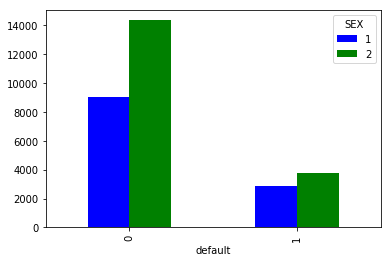

In [21]:
table_sex.plot.bar(color='bg')


In [22]:
nodef_sex = data[data['default'] == 0]['SEX']
def_sex = data[data['default'] == 1]['SEX']  

In [23]:
def proportions_diff_confint_ind(sample1, sample2, alpha=0.05):
    ''' Доверительный интервал для разности долей (независимые выборки)

    :param sample1: выборка 1 с бинарными значениями [0, 1]
    :param sample2: выборка 2 с бинарными значениями [0, 1]
    :param alpha: уровень доверия
    :return: доверительный интервал для разности долей (левая_граница, правая_граница)
    '''

    z = stats.norm.ppf(1 - alpha / 2.)

    p1 = float(sum(sample1)) / len(sample1)
    p2 = float(sum(sample2)) / len(sample2)

    left_boundary = (p1 - p2) - z * np.sqrt(
        p1 * (1 - p1) / len(sample1) + p2 * (1 - p2) / len(sample2))
    right_boundary = (p1 - p2) + z * np.sqrt(
        p1 * (1 - p1) / len(sample1) + p2 * (1 - p2) / len(sample2))

    return (left_boundary, right_boundary)

In [24]:
alpha = 0.05
interval = proportions_diff_confint_ind(list(map(lambda x: 0 if x == 2 else x, nodef_sex)),
                                        list(map(lambda x: 0 if x == 2 else x, def_sex)), alpha)
print ("%d confidence interval for a difference between proportions: [%.4f], [%.4f]" % ((1 - alpha) * 100, interval[0], interval[1]))

95 confidence interval for a difference between proportions: [-0.0605], [-0.0336]


In [25]:
oddsratio, pval = stats.fisher_exact(table_sex.values, alternative='two-sided')
print ("Odds ratio: %.2f" % oddsratio)
print ("P-value: %s" % pval)

Odds ratio: 0.82
P-value: 5.2528380520530976e-12


In [26]:
edu_names = ["Ph.D.", "Master", "Bachelor", "Graduate school", "Elementary education", "N/A"]
data.EDUCATION.value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [27]:
def_edu = data[data.default==1].EDUCATION.values
nodef_edu = data[data.default==0].EDUCATION.values

In [28]:
table_edu = data.pivot_table(index='default', 
     values="LIMIT_BAL", columns='EDUCATION', aggfunc = len, fill_value=0)
table_edu.head()

EDUCATION,0,1,2,3,4,5,6
default,,,,,,,
0,14,8549,10700,3680,116,262,43
1,0,2036,3330,1237,7,18,8


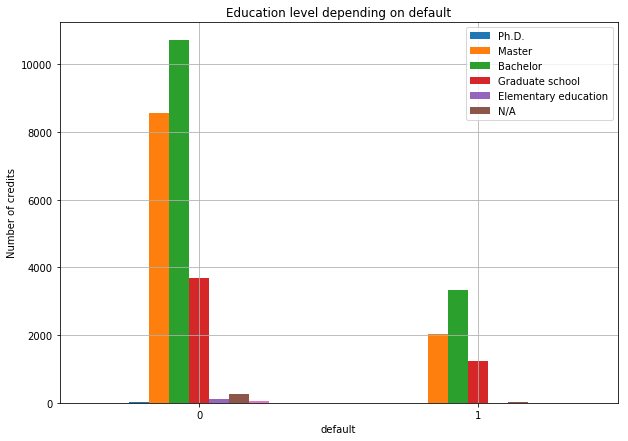

In [29]:
table_edu.plot.bar(rot=0, figsize=(10, 7))
plt.xlabel("default")
plt.ylabel("Number of credits")
plt.title("Education level depending on default")
plt.legend(edu_names)
plt.grid()
plt.show()

In [30]:
print (u'Кол-во объектов в таблице:', np.sum(np.array(table_edu)))
print (u'Доля элементов меньше 5:', 1.*np.sum(np.array(table_edu) < 5) / (table_edu.shape[0] * table_edu.shape[1]) )

Кол-во объектов в таблице: 30000
Доля элементов меньше 5: 0.07142857142857142


In [31]:
chi2, pval, dof, ex = stats.chi2_contingency(table_edu.values)
print ("chi2 contingency: %.4f, p-value: %s" % (chi2, pval))

chi2 contingency: 163.2166, p-value: 1.2332626245415605e-32


In [32]:
ex

array([[1.0903200e+01, 8.2435980e+03, 1.0926564e+04, 3.8293596e+03,
        9.5792400e+01, 2.1806400e+02, 3.9718800e+01],
       [3.0968000e+00, 2.3414020e+03, 3.1034360e+03, 1.0876404e+03,
        2.7207600e+01, 6.1936000e+01, 1.1281200e+01]])

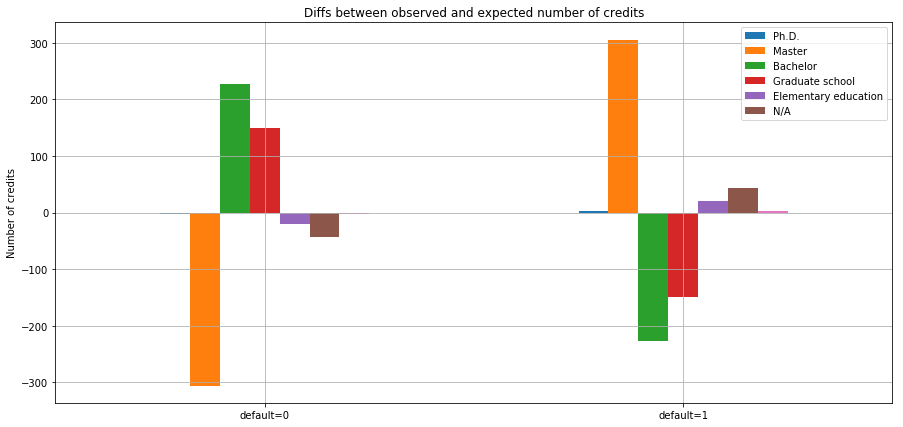

In [33]:
table_diff_edu1 = pd.DataFrame(data=ex-table_edu.values, columns=table_edu.columns)
table_diff_edu1.rename(index={0: "default=0", 1: "default=1"}, inplace=True)

table_diff_edu1.plot.bar(rot=0, figsize=(15, 7))
plt.ylabel("Number of credits")
plt.title("Diffs between observed and expected number of credits")
plt.legend(edu_names)
plt.grid()
plt.show()

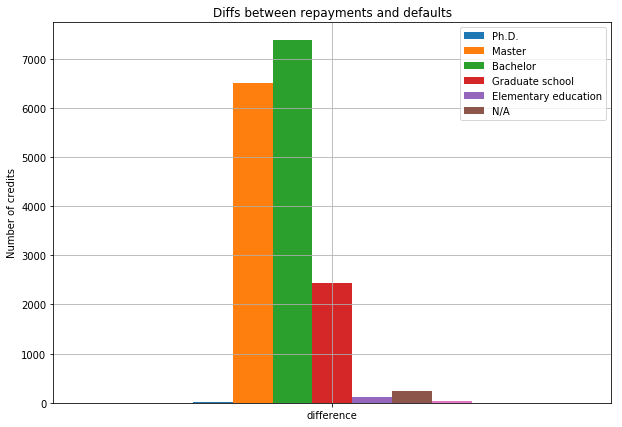

In [34]:
table_diff_edu2 = pd.DataFrame(data=np.array((table_edu.loc[0] - table_edu.loc[1])).reshape(1,7),
                               columns=table_edu.columns, index = ["difference"])

table_diff_edu2.plot.bar(rot=0, figsize=(10, 7))
plt.ylabel("Number of credits")
plt.title("Diffs between repayments and defaults")
plt.legend(edu_names)
plt.grid()
plt.show()

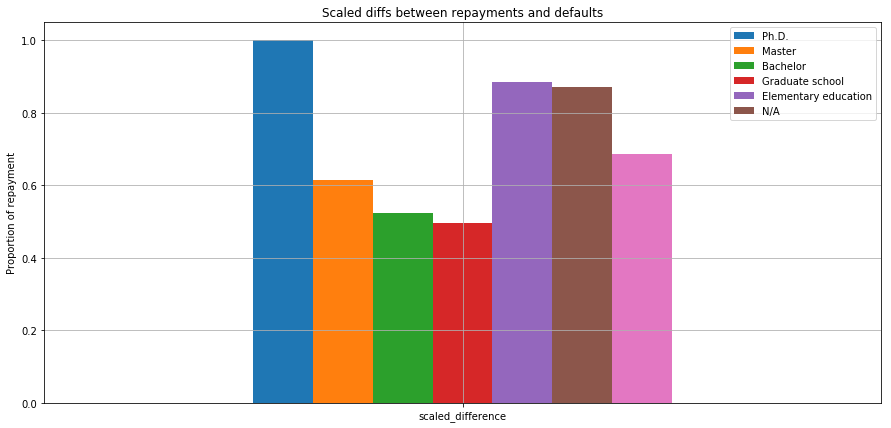

In [35]:
diff_edu2_scaled = (table_edu.loc[0] - table_edu.loc[1]) / ((table_edu.loc[0] + table_edu.loc[1]))
table_diff_edu2_scaled = pd.DataFrame(data=(np.array(diff_edu2_scaled)).reshape(1,7),
                                      columns=table_edu.columns, index = ["scaled_difference"])

table_diff_edu2_scaled.plot.bar(rot=0, figsize=(15, 7))
plt.ylabel("Proportion of repayment")
plt.title("Scaled diffs between repayments and defaults")
plt.legend(edu_names)
plt.grid()
plt.show()

In [36]:
mar_names = ["refused", "married", "single", "N/A"]
data.MARRIAGE.value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [37]:
table_mar = data.pivot_table(index='default', 
     values="LIMIT_BAL", columns='MARRIAGE', aggfunc = len, fill_value=0)
table_mar.head()

MARRIAGE,0,1,2,3
default,,,,
0,49,10453,12623,239
1,5,3206,3341,84


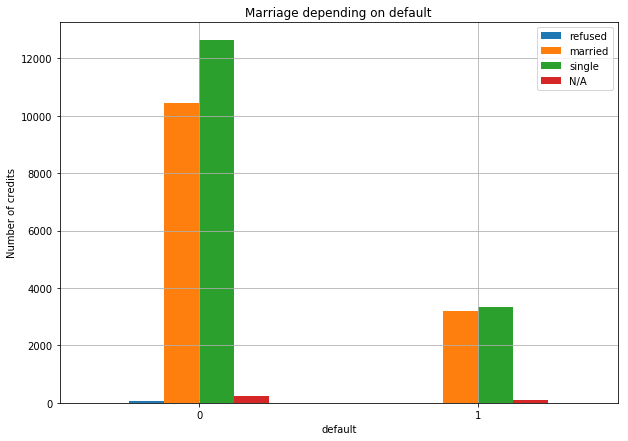

In [38]:
table_mar.plot.bar(rot=0, figsize=(10, 7))
plt.xlabel("default")
plt.ylabel("Number of credits")
plt.title("Marriage depending on default")
plt.legend(mar_names)
plt.grid()
plt.show()

In [39]:
print ('Кол-во измерений в совокупной выборке:', np.sum(np.array(table_mar)))
print ('Доля элементов меньше 5:', np.sum(np.array(table_mar) < 5) / (table_mar.shape[0] * table_mar.shape[1]) )

Кол-во измерений в совокупной выборке: 30000
Доля элементов меньше 5: 0.0


In [40]:
chi2, p, dof, exp = stats.chi2_contingency(table_mar)

n = table_mar.sum(axis = 0).sum()
cr_v = (chi2 / n) ** 0.5

print ('Cramer\'s V = %.4f' % cr_v)
print ('p-value = ', p)

Cramer's V = 0.0345
p-value =  8.825862457577375e-08


In [41]:
nodef_age = data[data['default'] == 0].AGE.values
def_age = data[data['default'] == 1].AGE.values

nodef_age_median = np.median(nodef_age)
def_age_median = np.median(def_age)

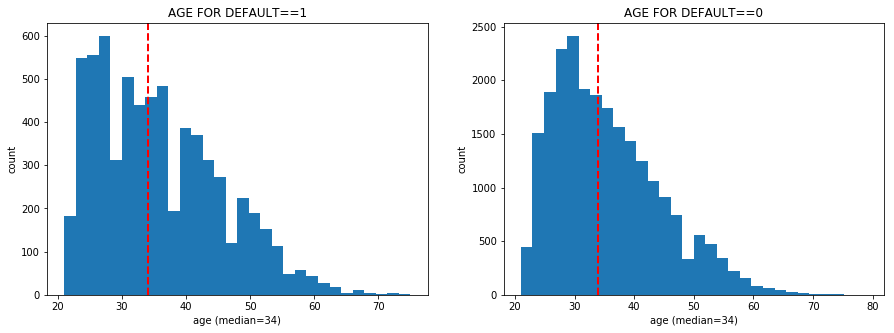

Median for DEF=1: 34.00
Median for DEF=0: 34.00


In [42]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.hist(def_age, bins=30)
plt.axvline(def_age_median, color='r', linestyle='dashed', linewidth=2)
plt.xlabel("age (median=%d)" % def_age_median)
plt.ylabel("count")
plt.title("AGE FOR DEFAULT==1")

plt.subplot(1,2,2)
plt.hist(nodef_age, bins=30)
plt.xlabel("age (median=%d)" % nodef_age_median)
plt.ylabel("count")
plt.title("AGE FOR DEFAULT==0")
plt.axvline(nodef_age_median, color='r', linestyle='dashed', linewidth=2)

plt.show()

print ("Median for DEF=1: %.2f" % def_age_median)
print ("Median for DEF=0: %.2f" % nodef_age_median)

In [43]:
np.random.seed(123)

def_median_scores = np.median(get_bootstrap_samples(def_age, 1000), axis=1)
nodef_median_scores = np.median(get_bootstrap_samples(nodef_age, 1000), axis=1)

print ("95% confidence interval for Default clients:",  stat_intervals(def_median_scores))
print ("95% confidence interval for Good clients:",  stat_intervals(nodef_median_scores))

95% confidence interval for Default clients: [34. 35.]
95% confidence interval for Good clients: [34. 34.]


In [44]:
age_median_delta = np.array(nodef_median_scores) - np.array(def_median_scores)

stat_intervals(age_median_delta, 0.05)

array([-1.,  0.])

In [45]:
stats.mannwhitneyu(def_age, nodef_age)

MannwhitneyuResult(statistic=76966879.5, pvalue=0.1862517717449308)

In [46]:
np.random.randint(0,10,(2,30))

array([[4, 0, 2, 6, 2, 3, 3, 7, 1, 8, 5, 2, 0, 0, 3, 9, 9, 2, 5, 7, 1, 7,
        0, 5, 0, 7, 9, 7, 8, 3],
       [3, 2, 5, 5, 9, 9, 3, 9, 7, 5, 1, 8, 5, 1, 9, 3, 3, 1, 9, 4, 6, 3,
        6, 2, 0, 4, 6, 8, 1, 2]])